In [2]:
import api_data_consolidation as adc

In [3]:
df = adc.load_full_df('2024-06-10', '12:00', '12:30')

In [4]:
df

,Vehicle ID Vehicle,Bearing,Current Status,Current Stop Sequence,Direction ID Vehicle,Latitude,Longitude,Revenue Vehicle,Last Updated,Route ID Vehicle,...,Stop ID Prediction,Vehicle ID Prediction,Collection Time Prediction,Prediction Error,Absolute Prediction Error,Prediction Frame,Bucket,Lower Tolerance,Upper Tolerance,Accurate
52,R-547CC9DE,350,STOPPED_AT,190.0,1,42.37432,-71.11860,REVENUE,2024-06-10 12:08:14-04:00,Red,...,70068,R-547CC9DE,2024-06-10 12:07:00-04:00,0 days 00:00:07,0 days 00:00:07,0 days 00:01:21,0-3 min,-1 days +23:59:30,0 days 00:01:30,True
53,R-547CC9DE,350,STOPPED_AT,190.0,1,42.37432,-71.11860,REVENUE,2024-06-10 12:08:14-04:00,Red,...,70068,R-547CC9DE,2024-06-10 12:11:00-04:00,0 days 00:00:00,0 days 00:00:00,-1 days +23:57:14,NaN,NaT,NaT,False
54,R-547CC9DE,350,STOPPED_AT,190.0,1,42.37432,-71.11860,REVENUE,2024-06-10 12:08:14-04:00,Red,...,70068,R-547CC9DE,2024-06-10 12:10:00-04:00,0 days 00:00:00,0 days 00:00:00,-1 days +23:58:14,NaN,NaT,NaT,False
55,R-547CC9DE,350,STOPPED_AT,190.0,1,42.37432,-71.11860,REVENUE,2024-06-10 12:08:14-04:00,Red,...,70068,R-547CC9DE,2024-06-10 12:06:00-04:00,0 days 00:00:07,0 days 00:00:07,0 days 00:02:21,0-3 min,-1 days +23:59:30,0 days 00:01:30,True
56,R-547CC9DE,350,STOPPED_AT,190.0,1,42.37432,-71.11860,REVENUE,2024-06-10 12:08:14-04:00,Red,...,70068,R-547CC9DE,2024-06-10 12:01:00-04:00,0 days 00:00:20,0 days 00:00:20,0 days 00:07:34,6-10 min,-1 days +23:59:00,0 days 00:03:30,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47079,G-10126,135,STOPPED_AT,70.0,1,42.34872,-71.13809,REVENUE,2024-06-10 12:11:31-04:00,Green-B,...,70126,G-10126,2024-06-10 12:05:00-04:00,-1 days +23:59:20,0 days 00:00:40,0 days 00:05:51,3-6 min,-1 days +23:59:00,0 days 00:02:30,True
47080,G-10126,135,STOPPED_AT,70.0,1,42.34872,-71.13809,REVENUE,2024-06-10 12:11:31-04:00,Green-B,...,70126,G-10126,2024-06-10 12:09:00-04:00,-1 days +23:59:50,0 days 00:00:10,0 days 00:02:21,0-3 min,-1 days +23:59:30,0 days 00:01:30,True
47081,G-10126,135,STOPPED_AT,70.0,1,42.34872,-71.13809,REVENUE,2024-06-10 12:11:31-04:00,Green-B,...,70126,G-10126,2024-06-10 12:08:00-04:00,-1 days +23:59:13,0 days 00:00:47,0 days 00:02:44,0-3 min,-1 days +23:59:30,0 days 00:01:30,False
47082,G-10126,135,STOPPED_AT,70.0,1,42.34872,-71.13809,REVENUE,2024-06-10 12:11:31-04:00,Green-B,...,70126,G-10126,2024-06-10 12:04:00-04:00,-1 days +23:59:20,0 days 00:00:40,0 days 00:06:51,6-10 min,-1 days +23:59:00,0 days 00:03:30,True


In [ ]:
#df = df[df['Route ID Prediction'].isin(['Blue', 'Orange'])]

In [6]:
adc.accuracy_table(df).to_csv('demo_accuracy_chart.csv')

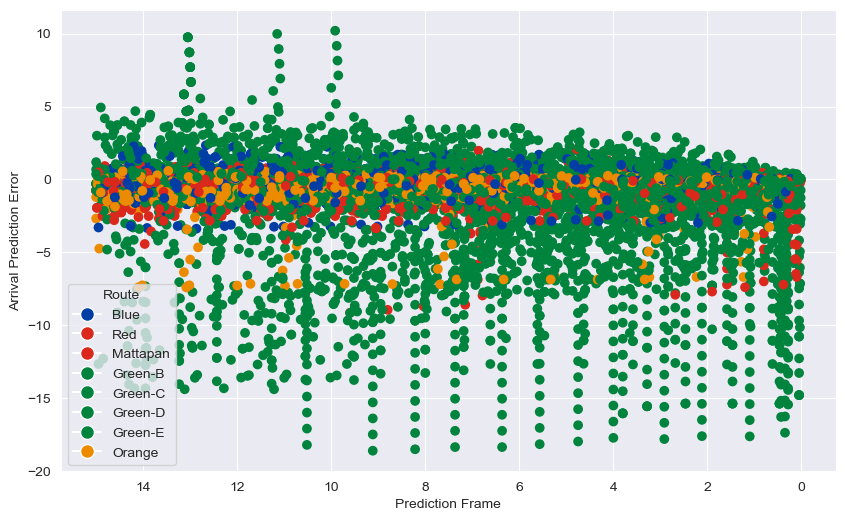

In [7]:
fig = adc.plot_prediction_error(df)

In [8]:
fig.savefig('plot.png')

In [15]:
import requests

# Get all light rail and subway routes
params = {
    'filter[type]': '0,1'  # 0 for Light Rail, 1 for Subway
}
routes_url = "https://api-v3.mbta.com/routes"
response = requests.get(routes_url, params=params)
routes_data = response.json()

# Fetch end stops for each direction of each route
end_stops = {}
for route in routes_data['data']:
    route_id = route['id']
    direction_destinations = route['attributes']['direction_destinations']
    end_stops[route_id] = {
        0: direction_destinations[0],
        1: direction_destinations[1]
    }

# Print the end stops dictionary
print(end_stops)


{'Red': {0: 'Ashmont/Braintree', 1: 'Alewife'}, 'Mattapan': {0: 'Mattapan', 1: 'Ashmont'}, 'Orange': {0: 'Forest Hills', 1: 'Oak Grove'}, 'Green-B': {0: 'Boston College', 1: 'Government Center'}, 'Green-C': {0: 'Cleveland Circle', 1: 'Government Center'}, 'Green-D': {0: 'Riverside', 1: 'Union Square'}, 'Green-E': {0: 'Heath Street', 1: 'Medford/Tufts'}, 'Blue': {0: 'Bowdoin', 1: 'Wonderland'}}


In [35]:
def get_mbta_stop_mapping():
    url = "https://api-v3.mbta.com/stops"
    params = {
        "filter[route_type]": "0,1",  # Subway and light rail
        "include": "route"
    }

    response = requests.get(url, params=params)
    data = response.json()

    stop_mapping = {}

    for stop in data["data"]:
        stop_desc = stop["attributes"]["description"]
        stop_name = stop["attributes"]["name"]
        stop_id = stop['id']
        stop_mapping[stop_id] = (stop_name, stop_desc)

    return stop_mapping

mbta_stop_mapping = get_mbta_stop_mapping()
print(mbta_stop_mapping)


{'70051': ('Orient Heights', 'Orient Heights - Blue Line - Bowdoin'), '70178': ('Brookline Hills', 'Brookline Hills - Green Line - Park Street & North'), '70234': ('Dean Road', 'Dean Road - Green Line - Park Street & North'), '70129': ('Griggs Street', 'Griggs Street - Green Line - (B) Boston College'), '70105': ('Braintree', 'Braintree - Red Line'), '70130': ('Harvard Avenue', 'Harvard Avenue - Green Line - Park Street & North'), '70177': ('Beaconsfield', 'Beaconsfield - Green Line - (D) Riverside'), '70241': ('Symphony', 'Symphony - Green Line - (E) Heath Street'), '70078': ('Downtown Crossing', 'Downtown Crossing - Red Line - Alewife'), '70151': ('Kenmore', 'Kenmore - Green Line - (C) Cleveland Circle, (D) Riverside'), '70244': ('Northeastern University', 'Northeastern University - Green Line - Park Street & North'), '70233': ('Dean Road', 'Dean Road - Green Line - (C) Cleveland Circle'), '70168': ('Newton Highlands', 'Newton Highlands - Green Line - Park Street & North'), '70246': 

In [23]:
routes_url = "https://api-v3.mbta.com/routes"
routes_params = {
    'filter[type]': '0,1'  # 0 for Light Rail, 1 for Subway
}

routes_response = requests.get(routes_url, params=routes_params)
routes_data = routes_response.json()

# Extract route IDs
route_ids = [route['id'] for route in routes_data['data']]

# Step 2: Get stops for each route
stop_ids = set()
for route_id in route_ids:
    stops_url = f"https://api-v3.mbta.com/stops?filter[route]={route_id}"
    stops_response = requests.get(stops_url)
    stops_data = stops_response.json()
    
    for stop in stops_data['data']:
        stop_ids.add(stop['id'])

# Convert the set to a list
stop_ids = list(stop_ids)

# Print the list
print(stop_ids)


['place-rvrwy', 'place-sumav', 'place-fenwd', 'place-aport', 'place-hwsst', 'place-brdwy', 'place-tumnl', 'place-sougr', 'place-brkhl', 'place-mispk', 'place-mfa', 'place-lech', 'place-brmnl', 'place-cool', 'place-bland', 'place-mgngl', 'place-davis', 'place-stpul', 'place-nuniv', 'place-symcl', 'place-butlr', 'place-cenav', 'place-fenwy', 'place-longw', 'place-capst', 'place-mlmnl', 'place-ogmnl', 'place-newtn', 'place-qamnl', 'place-bndhl', 'place-mdftf', 'place-kntst', 'place-bomnl', 'place-sull', 'place-cedgr', 'place-forhl', 'place-sbmnl', 'place-unsqu', 'place-dwnxg', 'place-welln', 'place-qnctr', 'place-engav', 'place-coecl', 'place-cntsq', 'place-grigg', 'place-rbmnl', 'place-bcnwa', 'place-waban', 'place-bmmnl', 'place-hsmnl', 'place-woodl', 'place-prmnl', 'place-tapst', 'place-masta', 'place-lake', 'place-bucen', 'place-asmnl', 'place-amory', 'place-wascm', 'place-river', 'place-north', 'place-portr', 'place-wimnl', 'place-wondl', 'place-grnst', 'place-astao', 'place-chswk', 

In [24]:
len(stop_ids)

125

In [33]:
def get_stop_names(stop_ids):
    base_url = "https://api-v3.mbta.com/stops/"

    stop_dict = {}

    for stop_id in stop_ids:
        try:
            response = requests.get(f"{base_url}{stop_id}")
            stop_data = response.json()
            stop_name = stop_data['data']['attributes']['name']
            stop_dict[stop_name] = stop_id
        except:
            pass

    return stop_dict

In [34]:
get_stop_names(stop_ids)    

{'Wood Island': 'place-wimnl',
 'Wonderland': 'place-wondl',
 'Green Street': 'place-grnst',
 'Assembly': 'place-astao',
 'Chiswick Road': 'place-chswk',
 'Kenmore': 'place-kencl',
 'Kendall/MIT': 'place-knncl',
 'JFK/UMass': 'place-jfk',
 'Roxbury Crossing': 'place-rcmnl',
 "Packard's Corner": 'place-brico',
 'Brookline Village': 'place-bvmnl',
 'Chestnut Hill Avenue': 'place-chill',
 'Boylston': 'place-boyls',
 'Harvard': 'place-harsq',
 "Saint Mary's Street": 'place-smary',
 'Shawmut': 'place-smmnl',
 'Babcock Street': 'place-babck',
 'Maverick': 'place-mvbcl',
 'Aquarium': 'place-aqucl',
 'South Station': 'place-sstat'}

In [37]:
import json
file_name = 'mbta_stop_mapping.json'
with open(file_name, 'w') as json_file:
    json.dump(mbta_stop_mapping, json_file, indent=4)